In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,accuracy_score



In [3]:
data = pd.read_csv("../data/Cancer_Data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

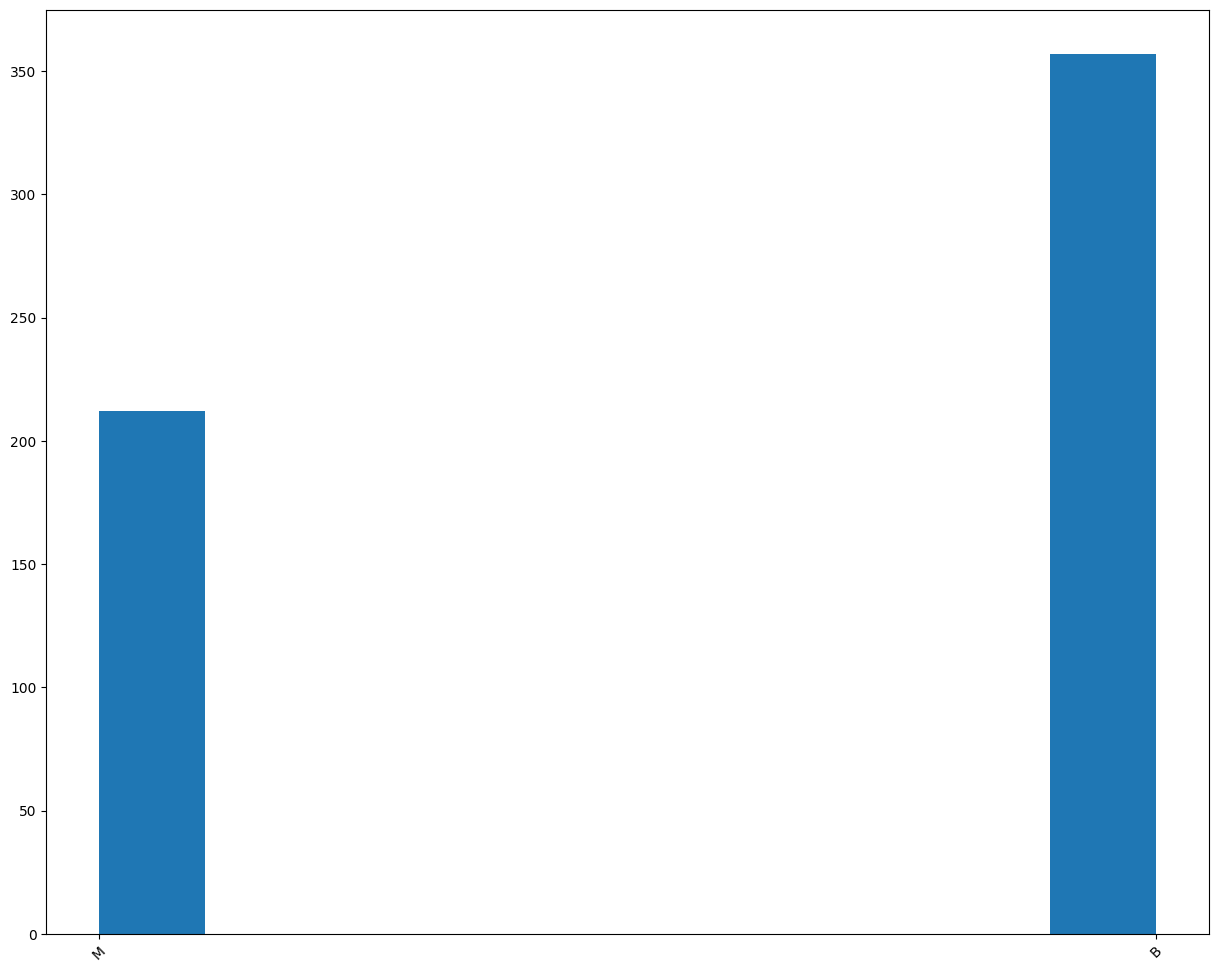

In [4]:
plt.figure(figsize=(15,12))
plt.xticks(rotation=45)
plt.hist(data["diagnosis"])

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [36]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: >

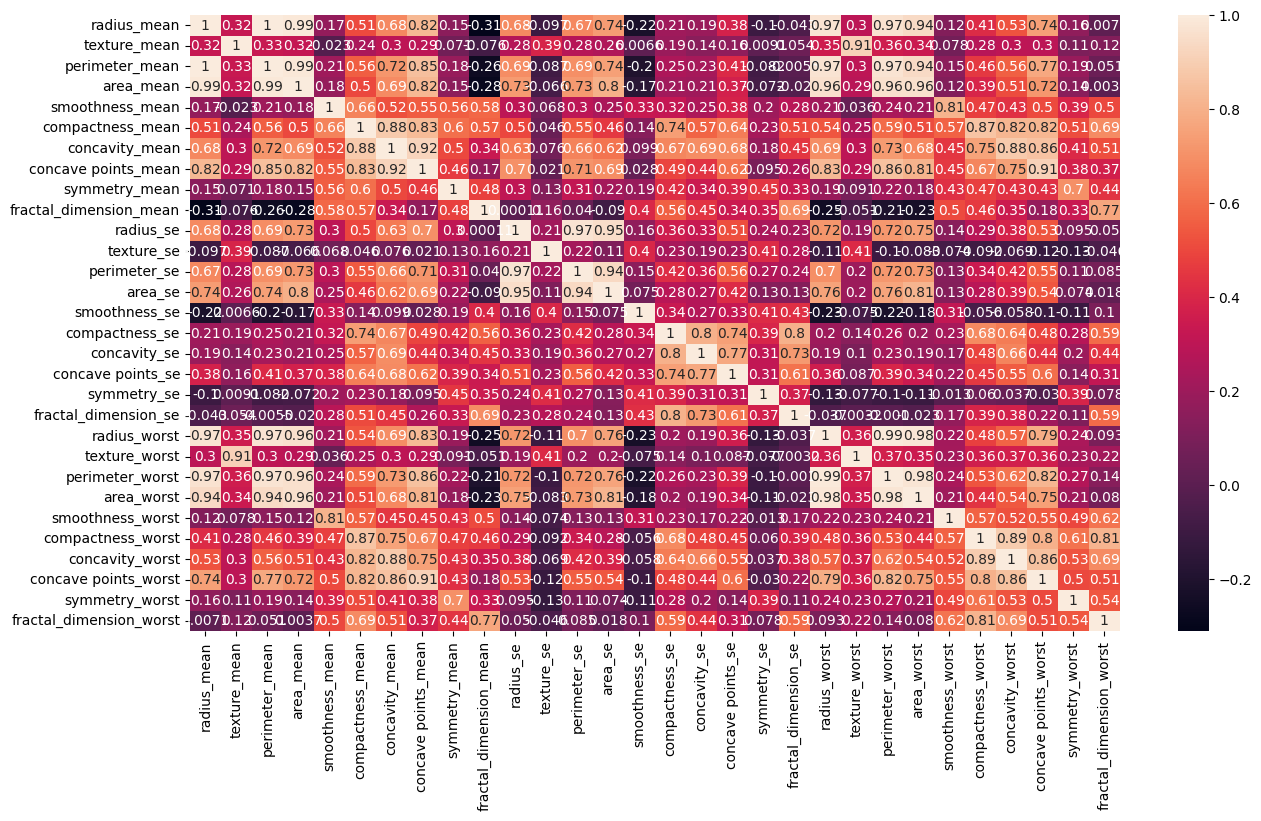

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.iloc[:,2:-1].corr(numeric_only=True),annot=True)

In [7]:
corr = data.iloc[:,2:-1].corr()[data.iloc[:,2:-1].corr()>0.9]

In [8]:
corr = pd.DataFrame(corr)

In [9]:
corr1 = corr.unstack(level=-1).reset_index().dropna().drop_duplicates().reset_index(drop=True)
corr2= corr1[corr1[0]!=1]
corr2

,level_0,level_1,0
1,radius_mean,perimeter_mean,0.997855
2,radius_mean,area_mean,0.987357
3,radius_mean,radius_worst,0.969539
4,radius_mean,perimeter_worst,0.965137
5,radius_mean,area_worst,0.941082
7,texture_mean,texture_worst,0.912045
8,perimeter_mean,radius_mean,0.997855
10,perimeter_mean,area_mean,0.986507
11,perimeter_mean,radius_worst,0.969476
12,perimeter_mean,perimeter_worst,0.970387


In [10]:
y = data.diagnosis
x = data.drop(["id","diagnosis","Unnamed: 32"],axis=1)

In [11]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [12]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
sc = StandardScaler()
sc.fit(x)
x_std = sc.transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)

In [14]:
x_std

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [15]:
x_std.iloc[:,:10]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


In [20]:
corr2

,level_0,level_1,0
1,radius_mean,perimeter_mean,0.997855
2,radius_mean,area_mean,0.987357
3,radius_mean,radius_worst,0.969539
4,radius_mean,perimeter_worst,0.965137
5,radius_mean,area_worst,0.941082
7,texture_mean,texture_worst,0.912045
8,perimeter_mean,radius_mean,0.997855
10,perimeter_mean,area_mean,0.986507
11,perimeter_mean,radius_worst,0.969476
12,perimeter_mean,perimeter_worst,0.970387


In [29]:
corr2["level_1"].unique()

array(['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'texture_worst', 'radius_mean',
       'concave points_mean', 'concavity_mean', 'concave points_worst',
       'perimeter_se', 'area_se', 'radius_se', 'texture_mean'],
      dtype=object)

In [21]:
data_2 = pd.concat([y,x_std.loc[:,["radius_mean",'perimeter_mean',
 'area_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst']]],axis=1)
data_2 = pd.melt(data_2,id_vars="diagnosis",var_name="features",value_name="value")
data_2

,diagnosis,features,value
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888
3,M,radius_mean,-0.768909
4,M,radius_mean,1.750297
...,...,...,...
3409,M,area_worst,2.015301
3410,M,area_worst,1.494959
3411,M,area_worst,0.427906
3412,M,area_worst,1.653171


<Axes: xlabel='features', ylabel='value'>

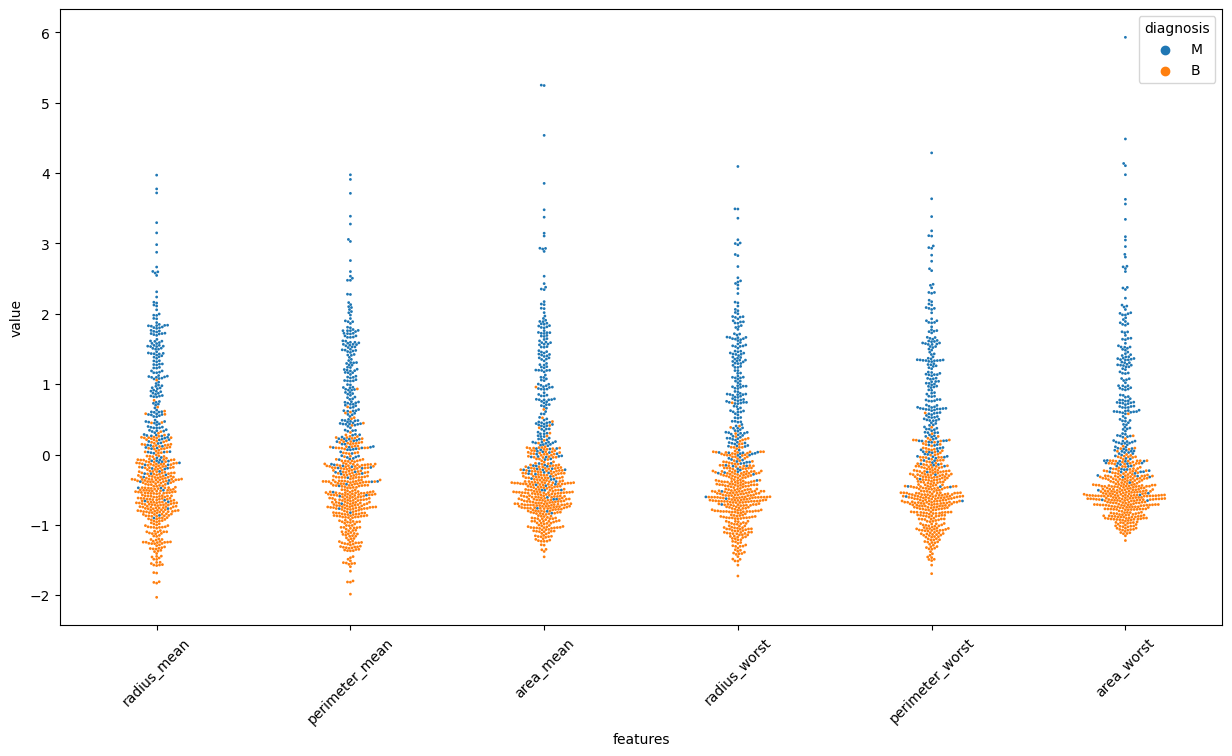

In [22]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.swarmplot(x="features",y="value",hue="diagnosis",data=data_2,size=2)


In [23]:
data_3 = pd.concat([y,x_std.loc[:,[ 'concave points_mean',
 'concavity_mean',
 'concave points_worst']]],axis=1)
data_3 = pd.melt(data_3,id_vars="diagnosis",var_name="features",value_name="value")
data_3

,diagnosis,features,value
0,M,concave points_mean,2.532475
1,M,concave points_mean,0.548144
2,M,concave points_mean,2.037231
3,M,concave points_mean,1.451707
4,M,concave points_mean,1.428493
...,...,...,...
1702,M,concave points_worst,1.629151
1703,M,concave points_worst,0.733827
1704,M,concave points_worst,0.414069
1705,M,concave points_worst,2.289985


<Axes: xlabel='features', ylabel='value'>

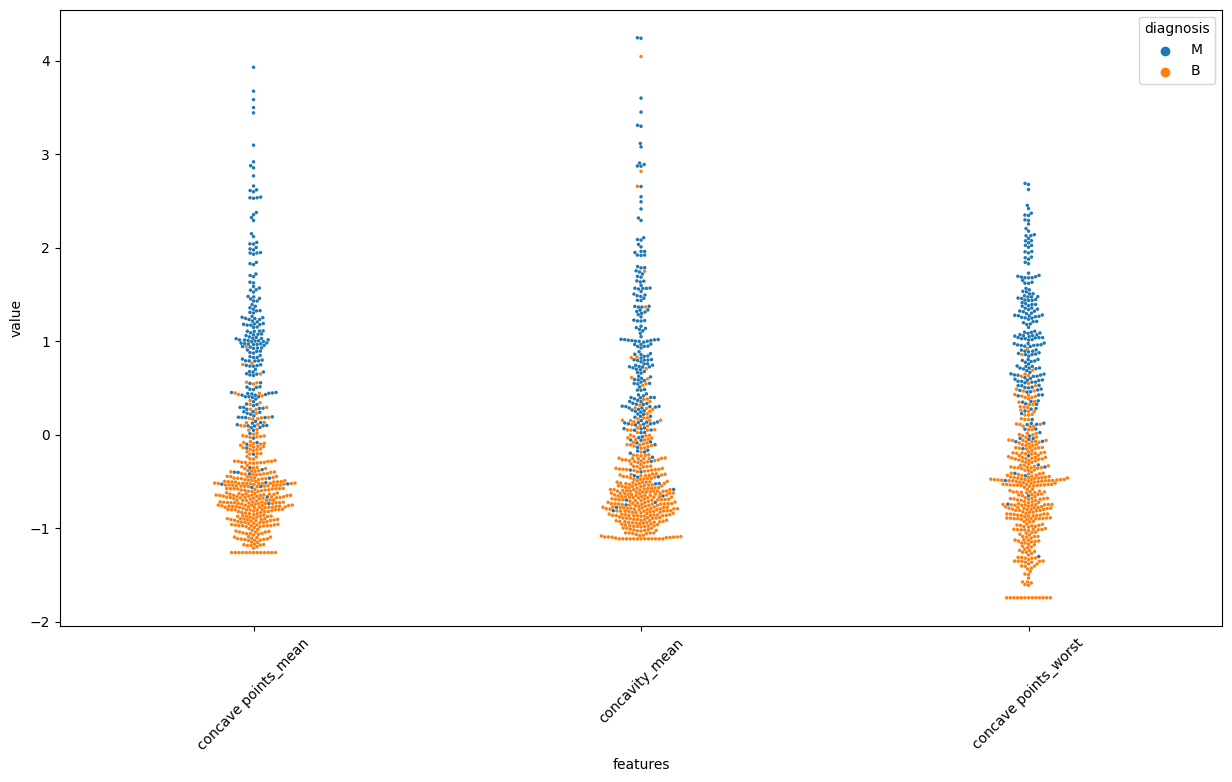

In [25]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.swarmplot(x="features",y="value",hue="diagnosis",data=data_3,size=2.5)

In [30]:
data_4 = pd.concat([y,x_std.loc[:,['texture_mean','texture_worst']]],axis=1)
data_4 = pd.melt(data_4,id_vars="diagnosis",var_name="features",value_name="value")
data_4



,diagnosis,features,value
0,M,texture_mean,-2.073335
1,M,texture_mean,-0.353632
2,M,texture_mean,0.456187
3,M,texture_mean,0.253732
4,M,texture_mean,-1.151816
...,...,...,...
1133,M,texture_worst,0.117700
1134,M,texture_worst,2.047399
1135,M,texture_worst,1.374854
1136,M,texture_worst,2.237926


<Axes: xlabel='features', ylabel='value'>

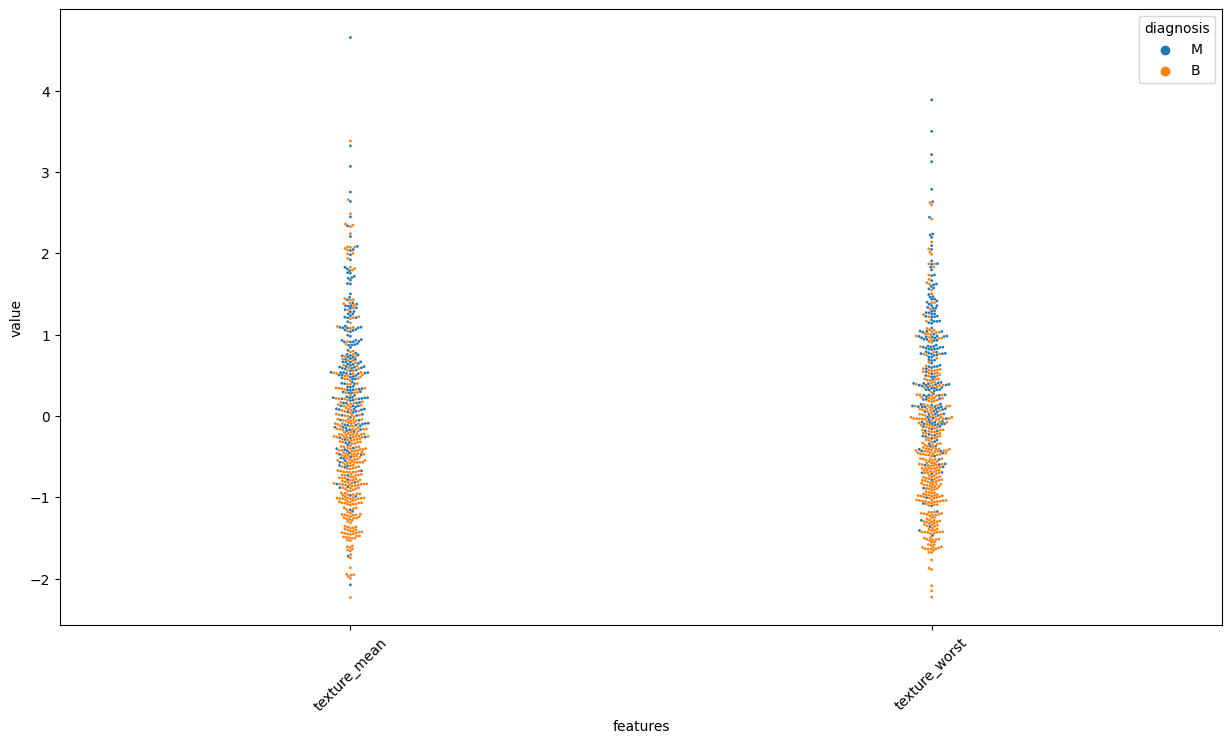

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.swarmplot(x="features",y="value",hue="diagnosis",data=data_4,size=2)

In [32]:
data_5 = pd.concat([y,x_std.loc[:,['perimeter_se', 'area_se', 'radius_se']]],axis=1)
data_5 = pd.melt(data_5,id_vars="diagnosis",var_name="features",value_name="value")
data_5



,diagnosis,features,value
0,M,perimeter_se,2.833031
1,M,perimeter_se,0.263327
2,M,perimeter_se,0.850928
3,M,perimeter_se,0.286593
4,M,perimeter_se,1.273189
...,...,...,...
1702,M,radius_se,2.782080
1703,M,radius_se,1.300499
1704,M,radius_se,0.184892
1705,M,radius_se,1.157935


<Axes: xlabel='features', ylabel='value'>

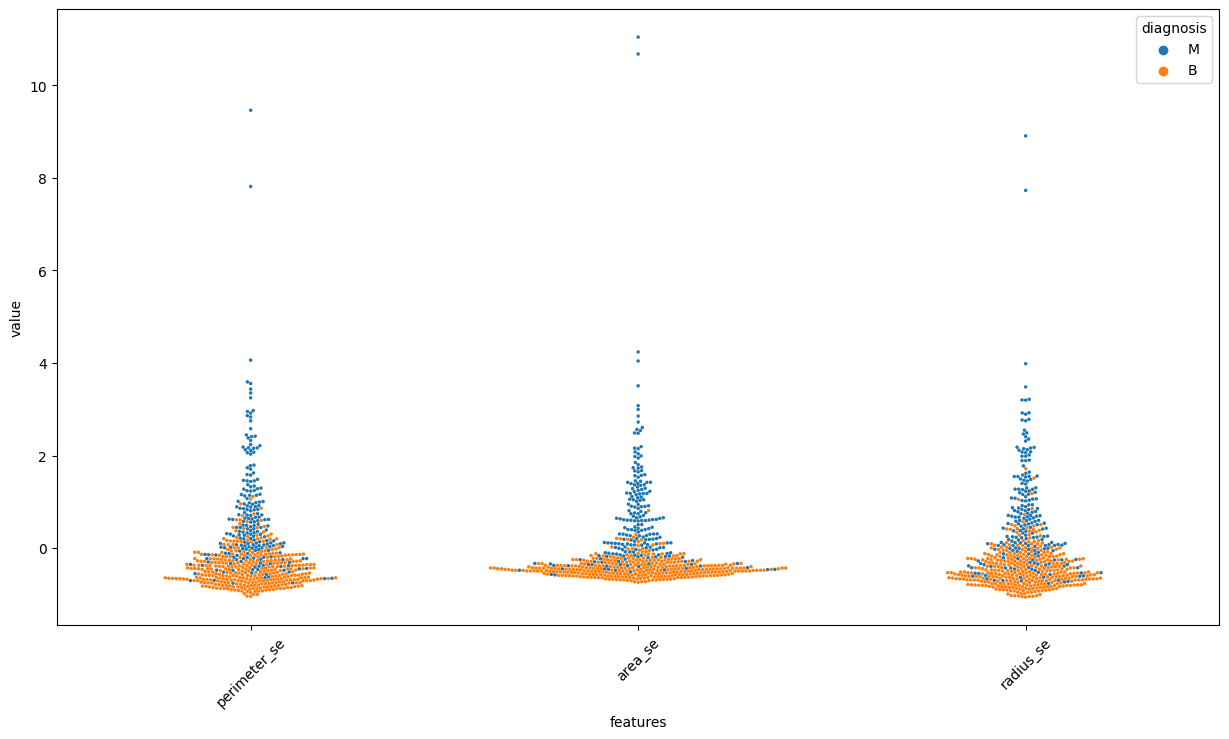

In [34]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.swarmplot(x="features",y="value",hue="diagnosis",data=data_5,size=2.5)

I have tried to plot highly correlated variable in same swarmplot,will help us removing the variable which will effective help for predictions.

From above :


        1. Plot one where we have "radius_mean",'perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst'. From all these variables    -----"area worst" seems effectively differetiate between Benign and Malignant.

        2. Plot two has 'concave points_mean','concavity_mean','concave points_worst' variable out of which "concave points_worst" can explain the output feature well.

        3. Plot three -- 'texture_mean','texture_worst' -- both are complex in nature we will go with  "texture_mean"

        4. From Plot 4 --- 'perimeter_se', 'area_se', 'radius_se' --- it seems "area se" can effectively contribute in prediction. 


In [41]:
to_drop = ["radius_mean",'perimeter_mean','area_mean','radius_worst','perimeter_worst','concave points_mean','concavity_mean','texture_worst','perimeter_se','radius_se']
filtered_X = x.drop(to_drop,axis=1)
filtered_X



,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.11590,0.1726,0.05623,1.2560,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,0.09780,0.10340,0.1752,0.05533,2.4630,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,0.08455,0.10230,0.1590,0.05648,1.0750,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,0.11780,0.27700,0.2397,0.07016,1.5950,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

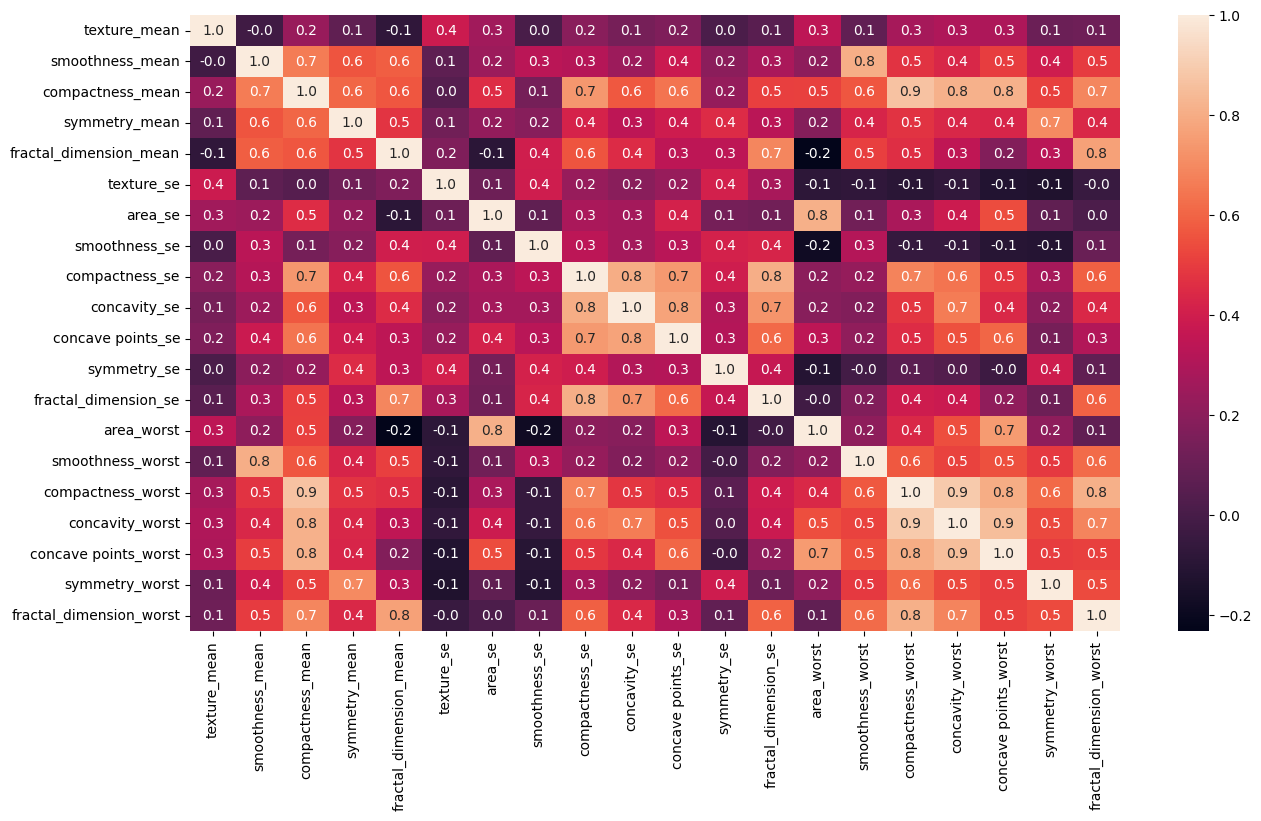

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(filtered_X.corr(),annot=True,fmt=".1f")

In [47]:
X_train,X_test,y_train,y_test = train_test_split(filtered_X,y,train_size=0.7)

In [48]:
sc1 = StandardScaler()
sc1.fit(X_train)
X_train_f = sc1.transform(X_train)
X_test_f = sc1.transform(X_test)


In [49]:
clf_1 = LogisticRegression(random_state=23)

<Axes: >

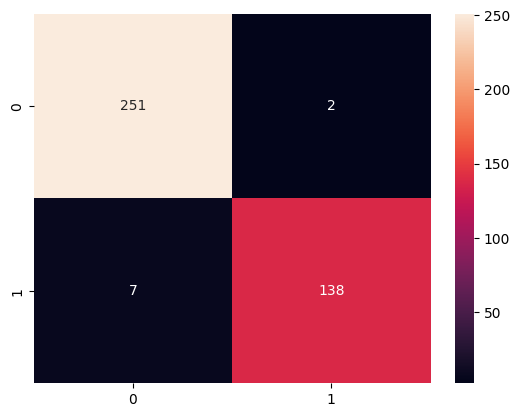

In [54]:
clf_1.fit(X_train_f,y_train)
y_pred = clf_1.predict(X_train_f)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt="d")

In [57]:
print("Accuracy is : ",accuracy_score(y_train,y_pred))

Accuracy is :  0.9773869346733668


Test data accuracy is :  0.9883040935672515


<Axes: >

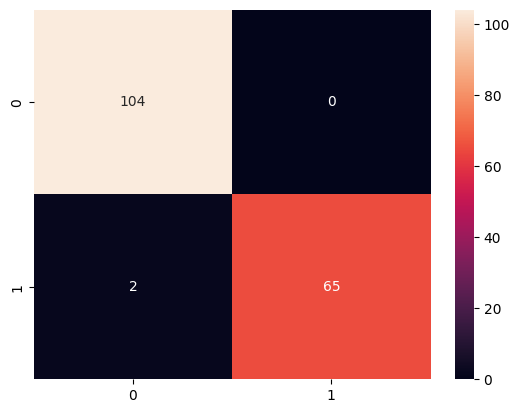

In [60]:
Y_pred = clf_1.predict(X_test_f)
print("Test data accuracy is : ",accuracy_score(y_test,Y_pred))

sns.heatmap(confusion_matrix(y_test,Y_pred),annot=True,fmt="d")

With basemodel itself we are able to achieve good accuracy_score on test data

In [67]:
np.unique(Y_pred,return_counts =True)

(array(['B', 'M'], dtype=object), array([106,  65], dtype=int64))

<Axes: >

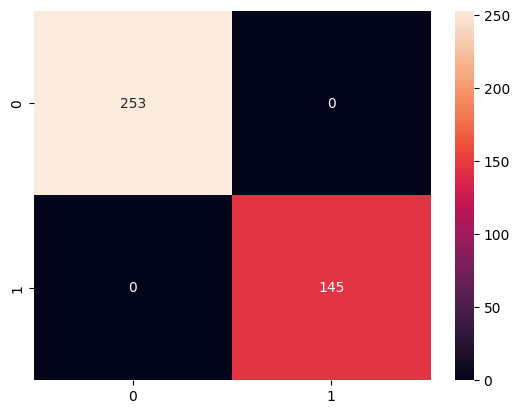

In [77]:
clf_2 = RandomForestClassifier(random_state=23)
clf_2.fit(X_train_f,y_train)
y_pred = clf_2.predict(X_train_f)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt="d")


Accuracy is :  1.0
Test data accuracy is :  0.9649122807017544


<Axes: >

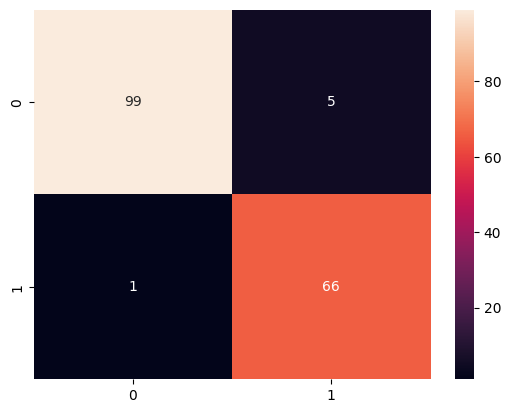

In [78]:
print("Accuracy is : ",accuracy_score(y_train,y_pred))
Y_pred = clf_2.predict(X_test_f)
print("Test data accuracy is : ",accuracy_score(y_test,Y_pred))

sns.heatmap(confusion_matrix(y_test,Y_pred),annot=True,fmt="d")

The aim is to reduce False negative cases. And we are pretty much does that with base model.